In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [12]:
input_img = tf.keras.Input(shape=(100, 100, 1))

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(300, (2, 2), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (2, 2), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model(input_img, decoded)

In [13]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 300)     3000      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 20, 20, 300)      0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 300)       810300    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 300)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 300)       8103

In [14]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [15]:
history = autoencoder.fit(x_train, x_train, epochs=1000, shuffle=True)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 59.4560 - mae: 7.2361 - mape: 102.5809 - rmse: 7.6126 - msle: 4.2618
Epoch 2/1000
1/1 [==============================] - 0s 38ms/step - loss: 24.2645 - mae: 4.1672 - mape: 74.7345 - rmse: 4.7745 - msle: 0.3441
Epoch 3/1000
1/1 [==============================] - 0s 38ms/step - loss: 43.9652 - mae: 6.0962 - mape: 84.4941 - rmse: 6.5211 - msle: 1.9666
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 33.0201 - mae: 5.1113 - mape: 68.6550 - rmse: 5.6218 - msle: 1.0619
Epoch 5/1000
1/1 [==============================] - 0s 40ms/step - loss: 10.1373 - mae: 2.3659 - mape: 38.4491 - rmse: 2.9570 - msle: 0.1814
Epoch 6/1000
1/1 [==============================] - 0s 37ms/step - loss: 54.8268 - mae: 6.6884 - mape: 115.3680 - rmse: 7.3112 - msle: 0.4985
Epoch 7/1000
1/1 [==============================] - 0s 37ms/step - loss: 14.0297 - mae: 2.8957 - mape: 35.9845 - rmse: 3.5606 - msle: 0.2596
Epoch 8/1000


1/1 [==============================] - 0s 36ms/step - loss: 1.8748 - mae: 0.6791 - mape: 10.4427 - rmse: 0.9165 - msle: 0.0150
Epoch 60/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8191 - mae: 0.6565 - mape: 10.2445 - rmse: 0.8869 - msle: 0.0143
Epoch 61/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7866 - mae: 0.6453 - mape: 10.3204 - rmse: 0.8697 - msle: 0.0140
Epoch 62/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7966 - mae: 0.6550 - mape: 10.5850 - rmse: 0.8766 - msle: 0.0143
Epoch 63/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7559 - mae: 0.6349 - mape: 10.1943 - rmse: 0.8544 - msle: 0.0136
Epoch 64/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7479 - mae: 0.6359 - mape: 10.0077 - rmse: 0.8510 - msle: 0.0133
Epoch 65/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7221 - mae: 0.6242 - mape: 9.9007 - rmse: 0.8370 - msle: 0.0130
Epoch 66/1000
1/1 [=========

1/1 [==============================] - 0s 38ms/step - loss: 1.3181 - mae: 0.4546 - mape: 7.7410 - rmse: 0.6217 - msle: 0.0086
Epoch 118/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3208 - mae: 0.4615 - mape: 7.7580 - rmse: 0.6250 - msle: 0.0085
Epoch 119/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3135 - mae: 0.4532 - mape: 7.7262 - rmse: 0.6204 - msle: 0.0085
Epoch 120/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3037 - mae: 0.4479 - mape: 7.5851 - rmse: 0.6136 - msle: 0.0083
Epoch 121/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3008 - mae: 0.4475 - mape: 7.5620 - rmse: 0.6124 - msle: 0.0082
Epoch 122/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3015 - mae: 0.4480 - mape: 7.6263 - rmse: 0.6142 - msle: 0.0084
Epoch 123/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2995 - mae: 0.4512 - mape: 7.5788 - rmse: 0.6137 - msle: 0.0082
Epoch 124/1000
1/1 [========

1/1 [==============================] - 0s 37ms/step - loss: 1.1406 - mae: 0.3814 - mape: 6.3741 - rmse: 0.5315 - msle: 0.0061
Epoch 176/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1428 - mae: 0.3902 - mape: 6.3412 - rmse: 0.5346 - msle: 0.0060
Epoch 177/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1400 - mae: 0.3836 - mape: 6.4427 - rmse: 0.5330 - msle: 0.0062
Epoch 178/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1356 - mae: 0.3842 - mape: 6.2404 - rmse: 0.5300 - msle: 0.0059
Epoch 179/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1248 - mae: 0.3711 - mape: 6.2252 - rmse: 0.5207 - msle: 0.0060
Epoch 180/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1142 - mae: 0.3642 - mape: 5.9974 - rmse: 0.5115 - msle: 0.0056
Epoch 181/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1065 - mae: 0.3564 - mape: 5.9464 - rmse: 0.5050 - msle: 0.0056
Epoch 182/1000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 1.0250 - mae: 0.3337 - mape: 5.5165 - rmse: 0.4759 - msle: 0.0050
Epoch 234/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0216 - mae: 0.3306 - mape: 5.5755 - rmse: 0.4733 - msle: 0.0050
Epoch 235/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0161 - mae: 0.3244 - mape: 5.4105 - rmse: 0.4684 - msle: 0.0049
Epoch 236/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0127 - mae: 0.3214 - mape: 5.3947 - rmse: 0.4658 - msle: 0.0049
Epoch 237/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0129 - mae: 0.3237 - mape: 5.4506 - rmse: 0.4670 - msle: 0.0049
Epoch 238/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0143 - mae: 0.3272 - mape: 5.4293 - rmse: 0.4695 - msle: 0.0049
Epoch 239/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0133 - mae: 0.3272 - mape: 5.5112 - rmse: 0.4694 - msle: 0.0049
Epoch 240/1000
1/1 [========

1/1 [==============================] - 0s 38ms/step - loss: 0.9638 - mae: 0.3302 - mape: 5.6085 - rmse: 0.4640 - msle: 0.0049
Epoch 292/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9630 - mae: 0.3292 - mape: 5.4010 - rmse: 0.4641 - msle: 0.0047
Epoch 293/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9474 - mae: 0.3093 - mape: 5.2379 - rmse: 0.4478 - msle: 0.0045
Epoch 294/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9489 - mae: 0.3127 - mape: 5.3041 - rmse: 0.4504 - msle: 0.0046
Epoch 295/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9576 - mae: 0.3264 - mape: 5.3655 - rmse: 0.4608 - msle: 0.0047
Epoch 296/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9504 - mae: 0.3179 - mape: 5.4042 - rmse: 0.4538 - msle: 0.0047
Epoch 297/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9411 - mae: 0.3058 - mape: 5.1528 - rmse: 0.4443 - msle: 0.0045
Epoch 298/1000
1/1 [========

1/1 [==============================] - 0s 37ms/step - loss: 0.9063 - mae: 0.3190 - mape: 5.4167 - rmse: 0.4484 - msle: 0.0045
Epoch 350/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8884 - mae: 0.2937 - mape: 4.9768 - rmse: 0.4288 - msle: 0.0042
Epoch 351/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9166 - mae: 0.3355 - mape: 5.4260 - rmse: 0.4612 - msle: 0.0045
Epoch 352/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9409 - mae: 0.3638 - mape: 6.1221 - rmse: 0.4876 - msle: 0.0052
Epoch 353/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9388 - mae: 0.3685 - mape: 5.8573 - rmse: 0.4862 - msle: 0.0049
Epoch 354/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9014 - mae: 0.3159 - mape: 5.3518 - rmse: 0.4467 - msle: 0.0045
Epoch 355/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8825 - mae: 0.2886 - mape: 4.8629 - rmse: 0.4258 - msle: 0.0041
Epoch 356/1000
1/1 [========

1/1 [==============================] - 0s 39ms/step - loss: 0.8453 - mae: 0.2933 - mape: 4.8180 - rmse: 0.4213 - msle: 0.0039
Epoch 408/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8352 - mae: 0.2773 - mape: 4.6636 - rmse: 0.4098 - msle: 0.0038
Epoch 409/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8349 - mae: 0.2780 - mape: 4.6797 - rmse: 0.4102 - msle: 0.0038
Epoch 410/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8417 - mae: 0.2916 - mape: 4.7956 - rmse: 0.4191 - msle: 0.0038
Epoch 411/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8489 - mae: 0.3017 - mape: 5.1123 - rmse: 0.4283 - msle: 0.0041
Epoch 412/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8536 - mae: 0.3131 - mape: 5.0827 - rmse: 0.4344 - msle: 0.0040
Epoch 413/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8508 - mae: 0.3059 - mape: 5.1337 - rmse: 0.4319 - msle: 0.0041
Epoch 414/1000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.8476 - mae: 0.3470 - mape: 5.7889 - rmse: 0.4616 - msle: 0.0046
Epoch 466/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8342 - mae: 0.3363 - mape: 5.3394 - rmse: 0.4475 - msle: 0.0041
Epoch 467/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7992 - mae: 0.2809 - mape: 4.7311 - rmse: 0.4071 - msle: 0.0037
Epoch 468/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7926 - mae: 0.2714 - mape: 4.5527 - rmse: 0.3997 - msle: 0.0036
Epoch 469/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8130 - mae: 0.3080 - mape: 4.9924 - rmse: 0.4250 - msle: 0.0038
Epoch 470/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8230 - mae: 0.3196 - mape: 5.3321 - rmse: 0.4372 - msle: 0.0042
Epoch 471/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8131 - mae: 0.3099 - mape: 4.9859 - rmse: 0.4264 - msle: 0.0038
Epoch 472/1000
1/1 [========

1/1 [==============================] - 0s 37ms/step - loss: 0.8415 - mae: 0.3899 - mape: 6.0629 - rmse: 0.4869 - msle: 0.0046
Epoch 524/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8250 - mae: 0.3641 - mape: 6.0297 - rmse: 0.4702 - msle: 0.0046
Epoch 525/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7858 - mae: 0.3178 - mape: 5.0415 - rmse: 0.4271 - msle: 0.0037
Epoch 526/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7521 - mae: 0.2614 - mape: 4.3770 - rmse: 0.3862 - msle: 0.0033
Epoch 527/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7609 - mae: 0.2779 - mape: 4.6408 - rmse: 0.3980 - msle: 0.0035
Epoch 528/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7915 - mae: 0.3299 - mape: 5.2584 - rmse: 0.4354 - msle: 0.0039
Epoch 529/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7973 - mae: 0.3321 - mape: 5.5398 - rmse: 0.4424 - msle: 0.0042
Epoch 530/1000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.8912 - mae: 0.4676 - mape: 6.9781 - rmse: 0.5603 - msle: 0.0057
Epoch 582/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7259 - mae: 0.2720 - mape: 4.5445 - rmse: 0.3861 - msle: 0.0033
Epoch 583/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7953 - mae: 0.3695 - mape: 6.0574 - rmse: 0.4678 - msle: 0.0045
Epoch 584/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9495 - mae: 0.5235 - mape: 7.8330 - rmse: 0.6112 - msle: 0.0067
Epoch 585/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8454 - mae: 0.4231 - mape: 7.0394 - rmse: 0.5195 - msle: 0.0056
Epoch 586/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7307 - mae: 0.2781 - mape: 4.4833 - rmse: 0.3945 - msle: 0.0032
Epoch 587/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7504 - mae: 0.3090 - mape: 4.9019 - rmse: 0.4192 - msle: 0.0036
Epoch 588/1000
1/1 [========

1/1 [==============================] - 0s 38ms/step - loss: 0.6797 - mae: 0.2404 - mape: 4.0152 - rmse: 0.3565 - msle: 0.0028
Epoch 640/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6795 - mae: 0.2422 - mape: 4.0079 - rmse: 0.3567 - msle: 0.0028
Epoch 641/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6790 - mae: 0.2409 - mape: 4.0236 - rmse: 0.3567 - msle: 0.0028
Epoch 642/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6783 - mae: 0.2421 - mape: 4.0036 - rmse: 0.3563 - msle: 0.0027
Epoch 643/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6775 - mae: 0.2403 - mape: 4.0165 - rmse: 0.3558 - msle: 0.0028
Epoch 644/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6766 - mae: 0.2408 - mape: 3.9863 - rmse: 0.3551 - msle: 0.0027
Epoch 645/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6757 - mae: 0.2389 - mape: 3.9857 - rmse: 0.3544 - msle: 0.0027
Epoch 646/1000
1/1 [========

1/1 [==============================] - 0s 35ms/step - loss: 0.6555 - mae: 0.2467 - mape: 4.1018 - rmse: 0.3546 - msle: 0.0027
Epoch 698/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6554 - mae: 0.2501 - mape: 4.0559 - rmse: 0.3550 - msle: 0.0026
Epoch 699/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6520 - mae: 0.2417 - mape: 4.0176 - rmse: 0.3507 - msle: 0.0026
Epoch 700/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6481 - mae: 0.2370 - mape: 3.8783 - rmse: 0.3457 - msle: 0.0025
Epoch 701/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6454 - mae: 0.2310 - mape: 3.8279 - rmse: 0.3423 - msle: 0.0025
Epoch 702/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6449 - mae: 0.2309 - mape: 3.8250 - rmse: 0.3420 - msle: 0.0025
Epoch 703/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6458 - mae: 0.2349 - mape: 3.8532 - rmse: 0.3440 - msle: 0.0025
Epoch 704/1000
1/1 [========

1/1 [==============================] - 0s 38ms/step - loss: 0.6271 - mae: 0.2413 - mape: 3.9679 - rmse: 0.3445 - msle: 0.0025
Epoch 756/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6195 - mae: 0.2277 - mape: 3.7099 - rmse: 0.3339 - msle: 0.0023
Epoch 757/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6182 - mae: 0.2257 - mape: 3.6871 - rmse: 0.3323 - msle: 0.0023
Epoch 758/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6218 - mae: 0.2333 - mape: 3.8445 - rmse: 0.3383 - msle: 0.0024
Epoch 759/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6266 - mae: 0.2470 - mape: 3.9787 - rmse: 0.3458 - msle: 0.0024
Epoch 760/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6277 - mae: 0.2452 - mape: 4.0443 - rmse: 0.3479 - msle: 0.0025
Epoch 761/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6258 - mae: 0.2467 - mape: 3.9501 - rmse: 0.3456 - msle: 0.0024
Epoch 762/1000
1/1 [========

1/1 [==============================] - 0s 38ms/step - loss: 0.5963 - mae: 0.2267 - mape: 3.6505 - rmse: 0.3281 - msle: 0.0022
Epoch 814/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6084 - mae: 0.2490 - mape: 4.0598 - rmse: 0.3465 - msle: 0.0024
Epoch 815/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6171 - mae: 0.2683 - mape: 4.2076 - rmse: 0.3593 - msle: 0.0025
Epoch 816/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6096 - mae: 0.2522 - mape: 4.1440 - rmse: 0.3491 - msle: 0.0025
Epoch 817/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5978 - mae: 0.2334 - mape: 3.7269 - rmse: 0.3323 - msle: 0.0022
Epoch 818/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5911 - mae: 0.2189 - mape: 3.5602 - rmse: 0.3226 - msle: 0.0021
Epoch 819/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5945 - mae: 0.2273 - mape: 3.7111 - rmse: 0.3282 - msle: 0.0022
Epoch 820/1000
1/1 [========

1/1 [==============================] - 0s 38ms/step - loss: 0.5698 - mae: 0.2149 - mape: 3.4567 - rmse: 0.3158 - msle: 0.0020
Epoch 872/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5847 - mae: 0.2460 - mape: 3.9904 - rmse: 0.3390 - msle: 0.0023
Epoch 873/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6092 - mae: 0.2906 - mape: 4.4911 - rmse: 0.3737 - msle: 0.0026
Epoch 874/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6119 - mae: 0.2904 - mape: 4.7120 - rmse: 0.3778 - msle: 0.0028
Epoch 875/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6018 - mae: 0.2803 - mape: 4.3451 - rmse: 0.3646 - msle: 0.0025
Epoch 876/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5790 - mae: 0.2372 - mape: 3.8476 - rmse: 0.3322 - msle: 0.0022
Epoch 877/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5670 - mae: 0.2133 - mape: 3.4248 - rmse: 0.3142 - msle: 0.0020
Epoch 878/1000
1/1 [========

1/1 [==============================] - 0s 38ms/step - loss: 0.6503 - mae: 0.3678 - mape: 5.9482 - rmse: 0.4445 - msle: 0.0038
Epoch 930/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5728 - mae: 0.2560 - mape: 3.9338 - rmse: 0.3469 - msle: 0.0022
Epoch 931/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5539 - mae: 0.2202 - mape: 3.4783 - rmse: 0.3190 - msle: 0.0020
Epoch 932/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6002 - mae: 0.3037 - mape: 4.8917 - rmse: 0.3851 - msle: 0.0029
Epoch 933/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6441 - mae: 0.3617 - mape: 5.3982 - rmse: 0.4388 - msle: 0.0034
Epoch 934/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6030 - mae: 0.3056 - mape: 4.9647 - rmse: 0.3894 - msle: 0.0030
Epoch 935/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5577 - mae: 0.2339 - mape: 3.6691 - rmse: 0.3266 - msle: 0.0020
Epoch 936/1000
1/1 [========

1/1 [==============================] - 0s 38ms/step - loss: 0.5267 - mae: 0.2037 - mape: 3.2458 - rmse: 0.3005 - msle: 0.0018
Epoch 988/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5269 - mae: 0.2042 - mape: 3.3028 - rmse: 0.3012 - msle: 0.0018
Epoch 989/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5273 - mae: 0.2069 - mape: 3.2891 - rmse: 0.3023 - msle: 0.0018
Epoch 990/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5278 - mae: 0.2078 - mape: 3.3604 - rmse: 0.3036 - msle: 0.0018
Epoch 991/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5290 - mae: 0.2126 - mape: 3.3643 - rmse: 0.3059 - msle: 0.0018
Epoch 992/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5305 - mae: 0.2152 - mape: 3.4926 - rmse: 0.3088 - msle: 0.0019
Epoch 993/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5334 - mae: 0.2244 - mape: 3.5300 - rmse: 0.3140 - msle: 0.0019
Epoch 994/1000
1/1 [========

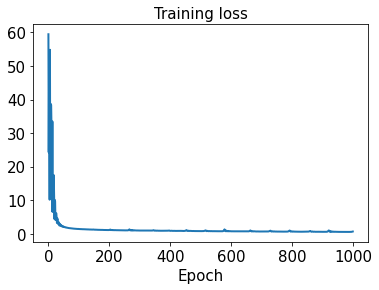

In [16]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

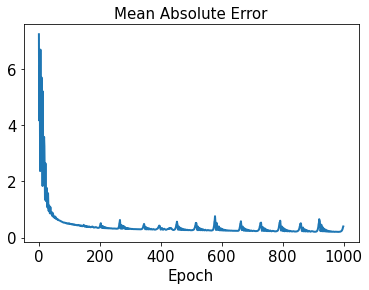

In [17]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [18]:
test_results = autoencoder.evaluate(x_test)

1/1 [==============================] - 0s 130ms/step - loss: 0.4326 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [19]:
decoded_imgs = autoencoder.predict(x_test)

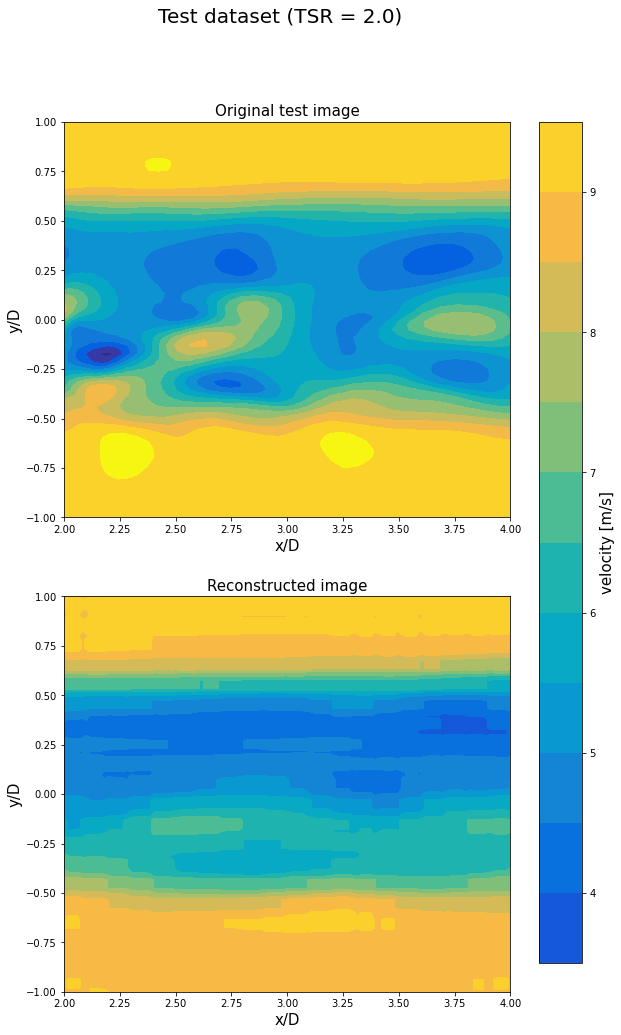

In [20]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [21]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[18.487349  ]
   [ 7.682301  ]
   [ 7.6988072 ]
   ...
   [ 3.6478415 ]
   [ 3.621508  ]
   [15.819502  ]]

  [[ 9.630129  ]
   [ 4.158474  ]
   [ 4.178637  ]
   ...
   [ 1.1144542 ]
   [ 1.0874301 ]
   [ 6.057767  ]]

  [[ 9.639633  ]
   [ 4.17259   ]
   [ 4.1917377 ]
   ...
   [ 1.1206876 ]
   [ 1.093667  ]
   [ 6.06567   ]]

  ...

  [[ 6.1882825 ]
   [ 2.8774989 ]
   [ 2.827912  ]
   ...
   [ 0.3009002 ]
   [ 0.25183284]
   [ 3.8910189 ]]

  [[ 6.203225  ]
   [ 2.89402   ]
   [ 2.8589134 ]
   ...
   [ 0.3553649 ]
   [ 0.30623406]
   [ 3.8399045 ]]

  [[14.028197  ]
   [ 5.86286   ]
   [ 5.817832  ]
   ...
   [ 1.1626737 ]
   [ 1.2194948 ]
   [13.116866  ]]]]


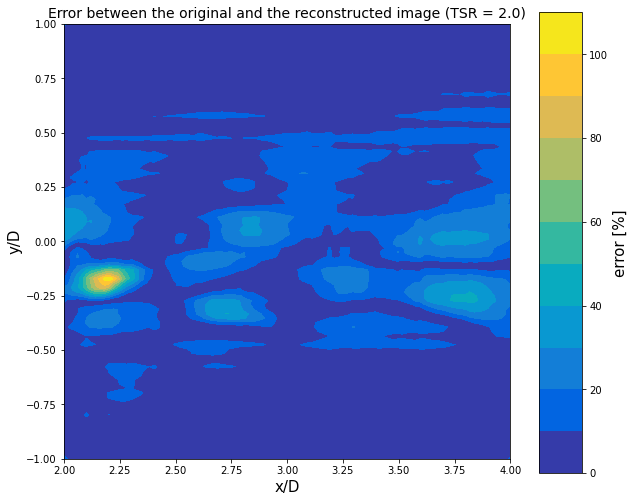

In [22]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

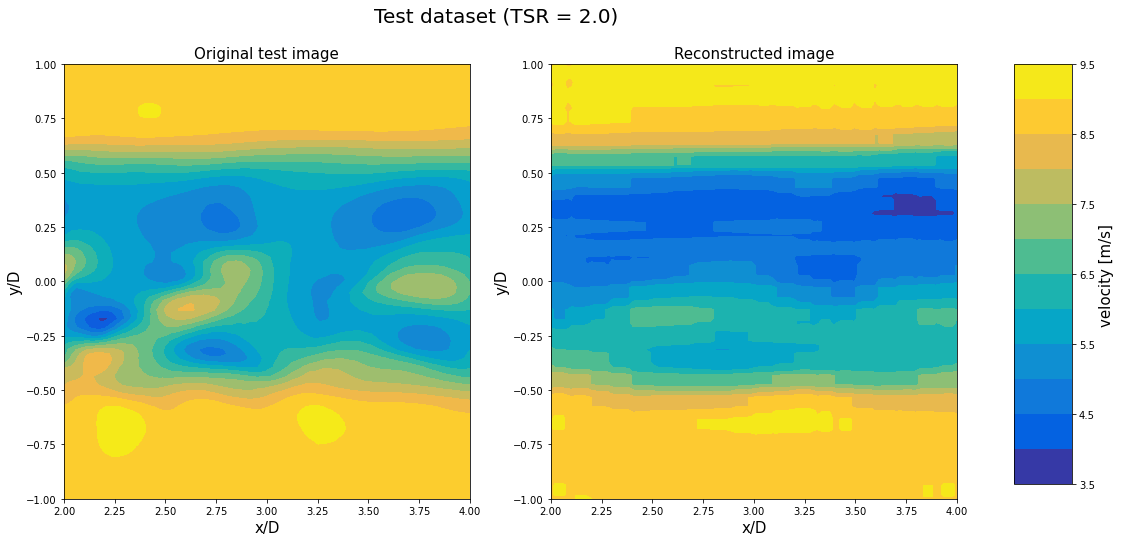

In [23]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [24]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict(train0).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [25]:
train0_orig = x_train[0].reshape(100, 100)

In [26]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [27]:
print(error_train0)

[[18.94483    8.374338   8.378218  ...  3.7171078  3.7465684 15.953951 ]
 [ 9.94827    4.8253946  4.817339  ...  1.2315043  1.259639   6.20519  ]
 [ 9.88441    4.7407584  4.7316785 ...  1.2346356  1.2627685  6.210134 ]
 ...
 [ 4.5278516  2.158788   2.0355818 ...  1.5384092  1.5750587  5.5933642]
 [ 4.480265   2.1110334  1.9994112 ...  1.5729623  1.6001781  5.616436 ]
 [12.641844   5.1760054  5.059594  ...  3.0711358  3.10719   14.774454 ]]


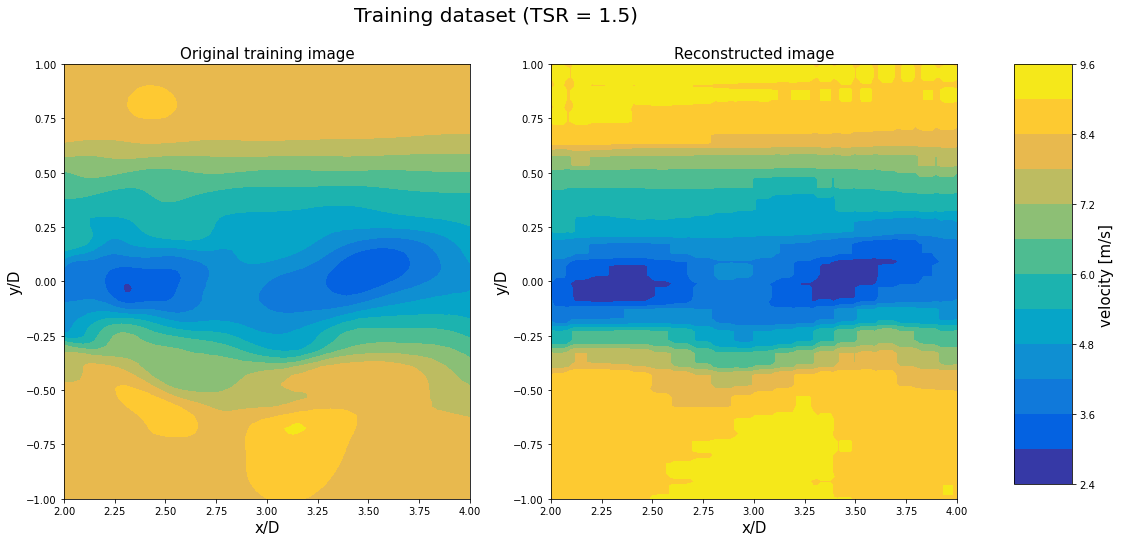

In [33]:
plt.figure(figsize=(16, 8))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

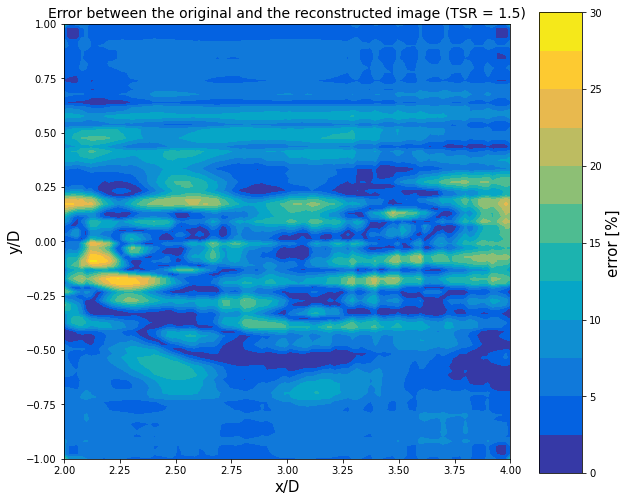

In [28]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

In [29]:
print(np.mean(error_train0))

6.90986


In [30]:
print(np.max(error_train0))

27.75899


In [31]:
print(np.mean(error_test))

9.25049


In [32]:
print(np.max(error_test))

108.4645
